## Conclusiones

Este proyecto se centra en explorar la efectividad y la aplicabilidad de los algoritmos de Machine Learning en la creación de estrategias de trading. Aprovechando los avances en aprendizaje automático, se embarca en un análisis exhaustivo con el objetivo de maximizar la rentabilidad y el rendimiento mediante la implementación y ajuste fino de diversas estrategias.

El proyecto examina la eficacia de estos algoritmos al desglosar y comparar múltiples estrategias, entre ellas:

1. **Regresión Logística (Logistic Regression)**: Un método de clasificación que utiliza la función logística para modelar la probabilidad de una clase particular. Se adapta bien a problemas de clasificación binaria y es útil para identificar puntos de entrada y salida en el mercado.

2. **SVC (Support Vector Classifier)**: Un algoritmo de clasificación que busca encontrar el hiperplano óptimo que mejor separa las clases en un espacio de características. Es eficaz en la identificación de patrones complejos en los datos y puede ser utilizado para generar señales de compra y venta.

3. **XGBoost**: Un algoritmo de aprendizaje supervisado que utiliza un conjunto de árboles de decisión para realizar predicciones. XGBoost es conocido por su eficacia en la gestión de conjuntos de datos grandes y complejos, y puede ser utilizado para mejorar la precisión de las señales de trading.

A través de un análisis comparativo profundo, el proyecto busca descubrir información detallada sobre las estrategias de trading. Examina la capacidad de los modelos para adaptarse a los cambios del mercado, mitigar riesgos y maximizar los retornos.

La documentación del proyecto comprende una investigación exhaustiva de múltiples estrategias, proporcionando una visión completa de sus fortalezas, debilidades y aplicaciones potenciales en escenarios de trading reales. Además, se busca ofrecer un informe claro y completo que detalle el proceso, descubrimientos e ideas obtenidos durante esta exploración rigurosa.

## Importar

In [1]:
from DL.main import perform, perform_validation

import pandas as pd
import optuna
import matplotlib.pyplot as plt

commission_value = 0.0025
take_profit_value = 0.05
stop_loss_value = 0.05

c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1 Dia

In [2]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1d_train.csv')
data_validation = pd.read_csv('data/aapl_1d_test.csv')

data['Timestamp'] = pd.to_datetime(data['Date'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Date'])

In [4]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)


c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000249E34881F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━

In [5]:
df_results

,gain,strategy,orders_executed
0,9.998885e+05,['lr'],232.0
1,9.998885e+05,['svc'],232.0
2,9.998885e+05,['xgboost'],232.0
3,9.876627e+05,['dl'],116.0
4,9.998885e+05,"['lr', 'svc']",232.0
5,9.998885e+05,"['lr', 'xgboost']",232.0
6,9.876627e+05,"['lr', 'dl']",116.0
7,9.998885e+05,"['svc', 'xgboost']",232.0
8,1.012226e+06,"['svc', 'dl']",116.0
9,9.876627e+05,"['xgboost', 'dl']",116.0


In [6]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],['dl'],"['lr', 'svc']","['lr', 'xgboost']","['lr', 'dl']","['svc', 'xgboost']","['svc', 'dl']","['xgboost', 'dl']","['lr', 'svc', 'xgboost']","['lr', 'svc', 'dl']","['lr', 'xgboost', 'dl']","['svc', 'xgboost', 'dl']","['lr', 'svc', 'xgboost', 'dl']"
14,999999.468728,999999.468728,999999.468728,999947.917564,999999.468728,999999.468728,999947.917564,999999.468728,1000051.551164,999947.917564,999999.468728,1000051.551164,1000051.551164,1000051.551164,1000051.551164
15,1000010.861536,1000010.861536,1000010.861536,999841.367568,1000010.861536,1000010.861536,999841.367568,1000010.861536,1000169.493968,999841.367568,1000010.861536,1000169.493968,1000169.493968,1000169.493968,1000169.493968
16,1000010.310608,1000010.310608,1000010.310608,999730.906504,1000010.310608,1000010.310608,999730.906504,1000010.310608,1000279.404104,999730.906504,1000010.310608,1000279.404104,1000279.404104,1000279.404104,1000279.404104
17,1000009.760632,1000009.760632,1000009.760632,999620.636316,1000009.760632,1000009.760632,999620.636316,1000009.760632,1000389.124316,999620.636316,1000009.760632,1000389.124316,1000389.124316,1000389.124316,1000389.124316
18,999992.477856,999992.477856,999992.477856,999510.366128,999992.477856,999992.477856,999510.366128,999992.477856,1000482.111728,999510.366128,999992.477856,1000482.111728,1000482.111728,1000482.111728,1000482.111728


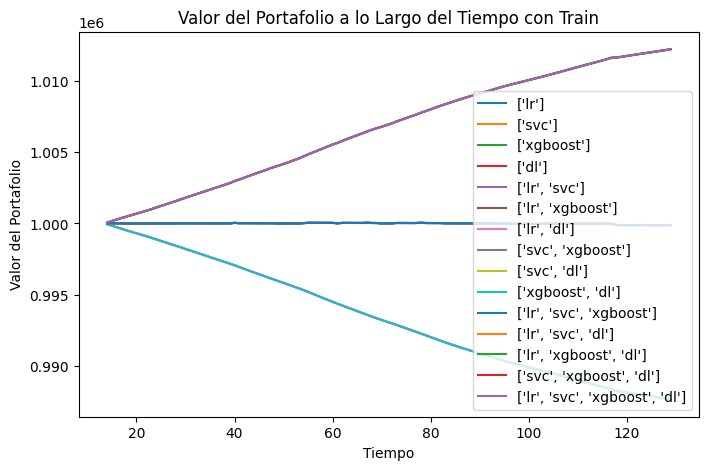

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [8]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [9]:
df_results

,gain,strategy,orders_executed
0,9.999380e+05,['lr'],232.0
1,9.999380e+05,['svc'],232.0
2,9.999380e+05,['xgboost'],232.0
3,1.014838e+06,['dl'],116.0
4,9.999380e+05,"['lr', 'svc']",232.0
5,9.999380e+05,"['lr', 'xgboost']",232.0
6,9.850997e+05,"['lr', 'dl']",116.0
7,9.999380e+05,"['svc', 'xgboost']",232.0
8,1.014838e+06,"['svc', 'dl']",116.0
9,9.850997e+05,"['xgboost', 'dl']",116.0


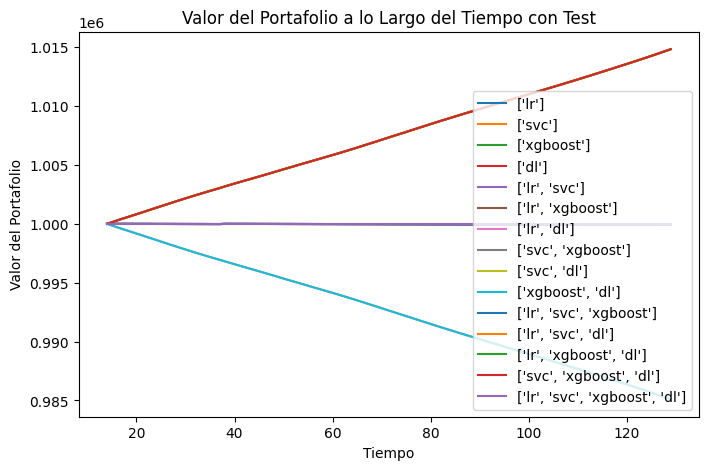

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 1 Hora

In [11]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1h_train.csv')
data_validation = pd.read_csv('data/aapl_1h_test.csv')

data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

In [13]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)

c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [14]:
df_results

,gain,strategy,orders_executed
0,9.999421e+05,['lr'],200.0
1,9.999421e+05,['svc'],200.0
2,9.999421e+05,['xgboost'],200.0
3,9.885063e+05,['dl'],100.0
4,9.999421e+05,"['lr', 'svc']",200.0
5,9.999421e+05,"['lr', 'xgboost']",200.0
6,1.011436e+06,"['lr', 'dl']",100.0
7,9.999421e+05,"['svc', 'xgboost']",200.0
8,1.011436e+06,"['svc', 'dl']",100.0
9,1.000000e+06,"['xgboost', 'dl']",0.0


In [15]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],['dl'],"['lr', 'svc']","['lr', 'xgboost']","['lr', 'dl']","['svc', 'xgboost']","['svc', 'dl']","['xgboost', 'dl']","['lr', 'svc', 'xgboost']","['lr', 'svc', 'dl']","['lr', 'xgboost', 'dl']","['svc', 'xgboost', 'dl']","['lr', 'svc', 'xgboost', 'dl']"
14,999999.39155,999999.39155,999999.39155,999996.235875,999999.39155,999999.39155,1000003.155675,999999.39155,1000003.155675,1000000,999999.39155,1000003.155675,1000003.155675,999996.235875,1000003.155675
15,999998.78355,999998.78355,999998.78355,999874.331877,999998.78355,999998.78355,1000124.451673,999998.78355,1000124.451673,1000000,999998.78355,1000124.451673,1000124.451673,999874.331877,1000124.451673
16,999998.182312,999998.182312,999998.182312,999753.783555,999998.182312,999998.182312,1000244.398757,999998.182312,1000244.398757,1000000,999998.182312,1000244.398757,1000244.398757,999753.783555,1000244.398757
17,999997.581612,999997.581612,999997.581612,999633.343206,999997.581612,999997.581612,1000364.238406,999997.581612,1000364.238406,1000000,999997.581612,1000364.238406,1000364.238406,999633.343206,1000364.238406
18,999996.977412,999996.977412,999996.977412,999512.20111,999996.977412,999996.977412,1000484.776302,999996.977412,1000484.776302,1000000,999996.977412,1000484.776302,1000484.776302,999512.20111,1000484.776302


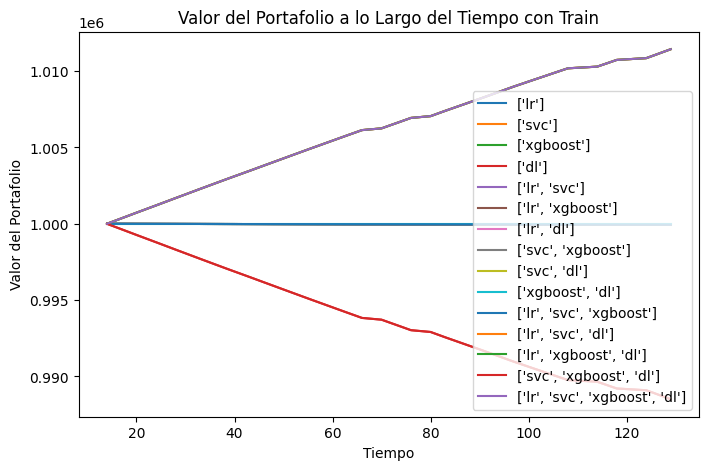

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [17]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [18]:
df_results

,gain,strategy,orders_executed
0,9.999225e+05,['lr'],232.0
1,9.999225e+05,['svc'],232.0
2,9.999225e+05,['xgboost'],232.0
3,9.845936e+05,['dl'],116.0
4,9.999225e+05,"['lr', 'svc']",232.0
5,9.999225e+05,"['lr', 'xgboost']",232.0
6,9.845936e+05,"['lr', 'dl']",116.0
7,9.999225e+05,"['svc', 'xgboost']",232.0
8,9.845936e+05,"['svc', 'dl']",116.0
9,9.845936e+05,"['xgboost', 'dl']",116.0


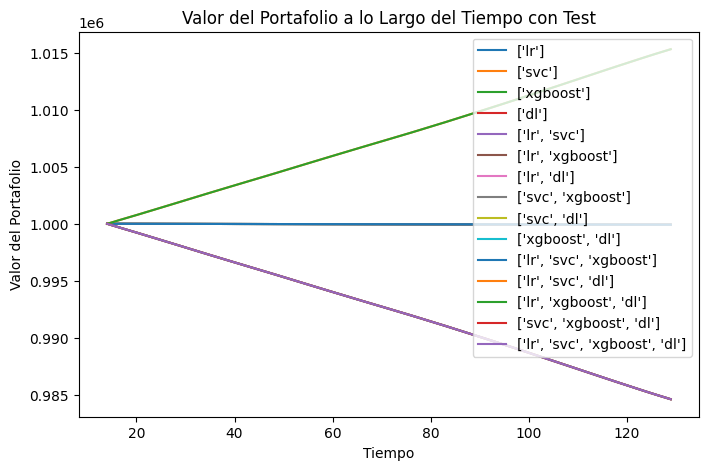

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 5 Min

In [20]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_5m_train.csv')
data_validation = pd.read_csv('data/aapl_5m_test.csv')

data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

## Train

In [22]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)

c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [23]:
df_results

,gain,strategy,orders_executed
0,9.999248e+05,['lr'],232.0
1,9.999248e+05,['svc'],232.0
2,9.999248e+05,['xgboost'],232.0
3,1.014881e+06,['dl'],116.0
4,9.999248e+05,"['lr', 'svc']",232.0
5,9.999248e+05,"['lr', 'xgboost']",232.0
6,1.014881e+06,"['lr', 'dl']",116.0
7,9.999248e+05,"['svc', 'xgboost']",232.0
8,1.000000e+06,"['svc', 'dl']",0.0
9,1.000000e+06,"['xgboost', 'dl']",0.0


In [24]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],['dl'],"['lr', 'svc']","['lr', 'xgboost']","['lr', 'dl']","['svc', 'xgboost']","['svc', 'dl']","['xgboost', 'dl']","['lr', 'svc', 'xgboost']","['lr', 'svc', 'dl']","['lr', 'xgboost', 'dl']","['svc', 'xgboost', 'dl']","['lr', 'svc', 'xgboost', 'dl']"
14,999999.344775,999999.344775,999999.344775,1000000.194086,999999.344775,999999.344775,1000000.194086,999999.344775,1000000,1000000,999999.344775,1000000.194086,999999.15069,999999.15069,1000000.194086
15,999998.691026,999998.691026,999998.691026,1000130.617104,999998.691026,999998.691026,1000130.617104,999998.691026,1000000,1000000,999998.691026,1000130.617104,999868.073922,999868.073922,1000130.617104
16,999998.037477,999998.037477,999998.037477,1000261.000122,999998.037477,999998.037477,1000261.000122,999998.037477,1000000,1000000,999998.037477,1000261.000122,999737.037354,999737.037354,1000261.000122
17,999997.382477,999997.382477,999997.382477,1000391.672622,999997.382477,999997.382477,1000391.672622,999997.382477,1000000,1000000,999997.382477,1000391.672622,999605.709854,999605.709854,1000391.672622
18,999996.730927,999996.730927,999996.730927,1000521.656844,999996.730927,999996.730927,1000521.656844,999996.730927,1000000,1000000,999996.730927,1000521.656844,999475.074082,999475.074082,1000521.656844


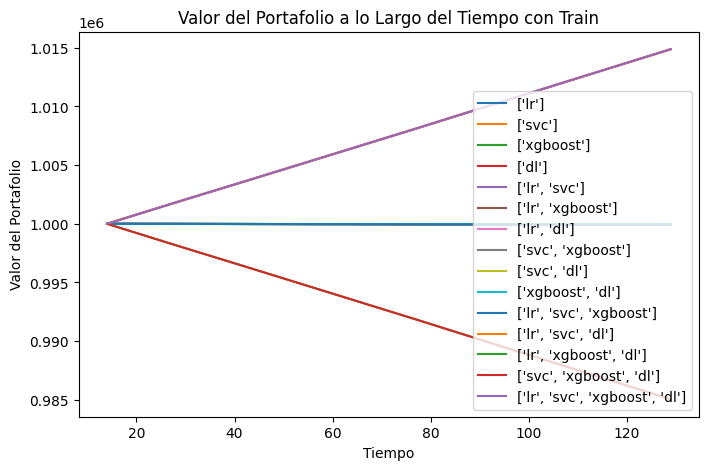

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [26]:
data_validation = data_validation.head(120)

In [27]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [28]:
df_results

,gain,strategy,orders_executed
0,9.999404e+05,['lr'],190.0
1,9.999404e+05,['svc'],190.0
2,9.999404e+05,['xgboost'],190.0
3,1.000000e+06,['dl'],0.0
4,9.999404e+05,"['lr', 'svc']",190.0
5,9.999404e+05,"['lr', 'xgboost']",190.0
6,1.000000e+06,"['lr', 'dl']",0.0
7,9.999404e+05,"['svc', 'xgboost']",190.0
8,9.881811e+05,"['svc', 'dl']",95.0
9,9.881811e+05,"['xgboost', 'dl']",95.0


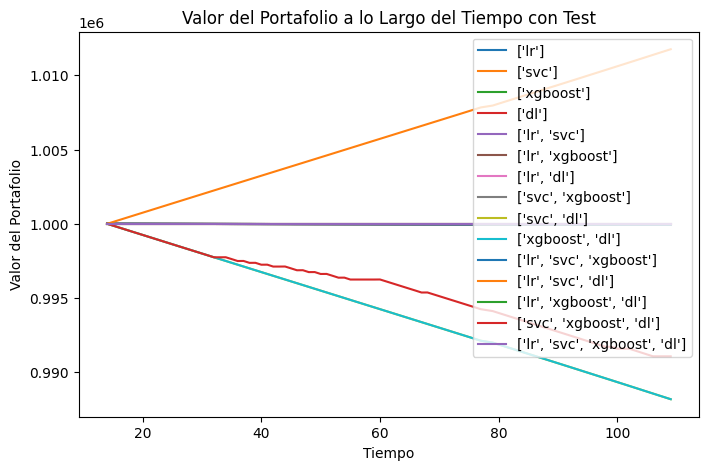

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 1 Min

In [30]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1m_train.csv')
data_validation = pd.read_csv('data/aapl_1m_test.csv')

## Train

In [32]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [33]:
df_results

,gain,strategy,orders_executed
0,9.999241e+05,['lr'],232.0
1,9.999241e+05,['svc'],232.0
2,9.999241e+05,['xgboost'],232.0
3,1.000000e+06,['dl'],0.0
4,9.999241e+05,"['lr', 'svc']",232.0
5,9.999241e+05,"['lr', 'xgboost']",232.0
6,1.000000e+06,"['lr', 'dl']",0.0
7,9.999241e+05,"['svc', 'xgboost']",232.0
8,1.001305e+06,"['svc', 'dl']",10.0
9,1.000000e+06,"['xgboost', 'dl']",0.0


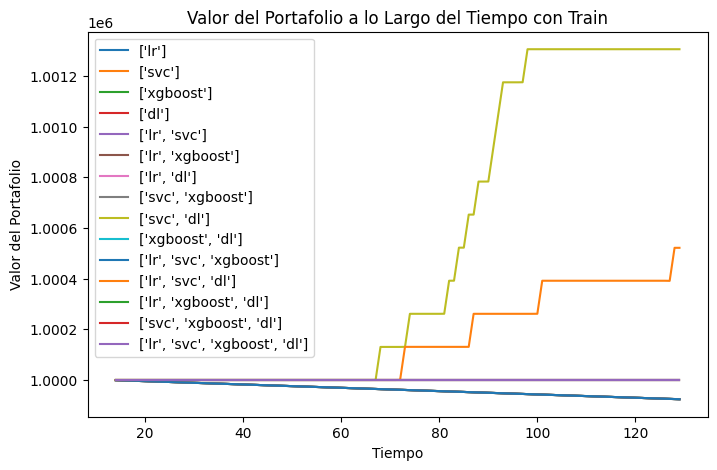

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [35]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [36]:
df_results

,gain,strategy,orders_executed
0,999890.76,['lr'],232.0
1,999890.76,['svc'],232.0
2,999890.76,['xgboost'],232.0
3,1000000.00,['dl'],0.0
4,999890.76,"['lr', 'svc']",232.0
5,999890.76,"['lr', 'xgboost']",232.0
6,1000000.00,"['lr', 'dl']",0.0
7,999890.76,"['svc', 'xgboost']",232.0
8,1000000.00,"['svc', 'dl']",0.0
9,1000000.00,"['xgboost', 'dl']",0.0


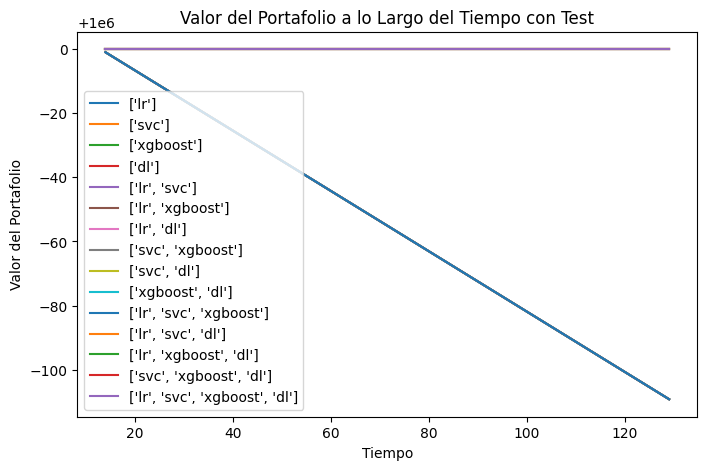

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()